In [19]:
pip install h5py numpy scipy

Note: you may need to restart the kernel to use updated packages.


In [24]:
with open(r"C:\Users\uisco\Documents\GitHub\RoboticHand_UdG_Karina\provesEMG_Ninapro_df\s1\S1_A1_E1.mat", "rb") as f:
    header = f.read(128)

print(header.decode(errors="ignore"))


MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Jul 28 11:54:15 2014                                                  IM


In [27]:
from scipy.io import loadmat

data = loadmat(r"C:\Users\uisco\Documents\GitHub\RoboticHand_UdG_Karina\provesEMG_Ninapro_df\s1\S1_A1_E1.mat")

for k in data.keys():
    if not k.startswith("__"):
        print(k, type(data[k]), getattr(data[k], "shape", None))

emg <class 'numpy.ndarray'> (101014, 10)
stimulus <class 'numpy.ndarray'> (101014, 1)
glove <class 'numpy.ndarray'> (101014, 22)
subject <class 'numpy.ndarray'> (1, 1)
exercise <class 'numpy.ndarray'> (1, 1)
repetition <class 'numpy.ndarray'> (101014, 1)
restimulus <class 'numpy.ndarray'> (101014, 1)
rerepetition <class 'numpy.ndarray'> (101014, 1)


In [28]:
import numpy as np

emg = data['emg']
stimulus = data['stimulus'].ravel()
#glove = data['glove']
#subject = data['subject'].ravel()
exercise = int(data['exercise'][0, 0])
repetition = data['repetition'].ravel()
#restimulus = data['restimulus'].ravel()
#rerepetition = data['rerepetition'].ravel()

print("EMG shape:", emg.shape)
print("Stimulus labels:", np.unique(stimulus))
print("Repetitions:", np.unique(repetition))
print("Exercise:", exercise)


EMG shape: (101014, 10)
Stimulus labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Repetitions: [ 0  1  2  3  4  5  6  7  8  9 10]
Exercise: 1


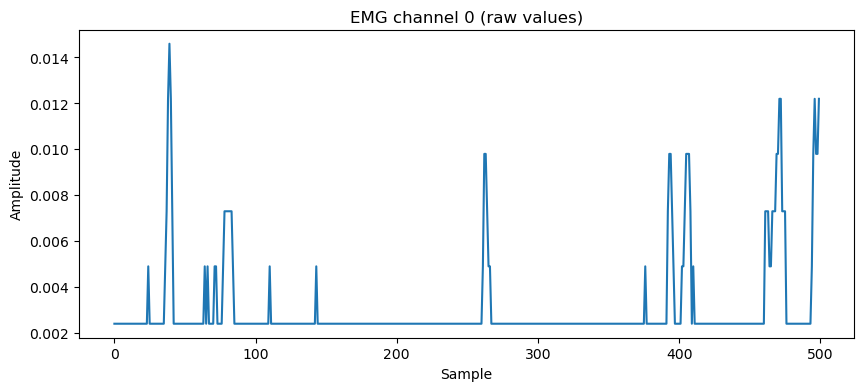

In [42]:
for i in range(1):
    plt.figure(figsize=(10, 4))
    plt.plot(emg[10000:10500, 0])
    plt.title("EMG channel 0 (raw values)")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.show()


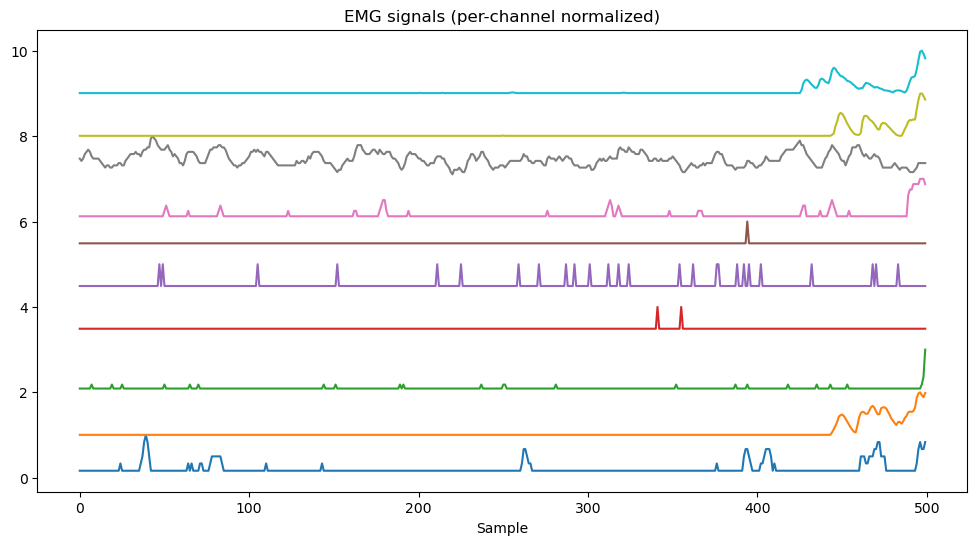

In [43]:
window = emg[10000:10500, :]

# normalize each channel independently
window_norm = window / np.max(np.abs(window), axis=0)

plt.figure(figsize=(12, 6))
for ch in range(window_norm.shape[1]):
    plt.plot(window_norm[:, ch] + ch)

plt.title("EMG signals (per-channel normalized)")
plt.xlabel("Sample")
plt.show()
